In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('diabet.csv')
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [3]:
X=df.iloc[:,:-1]
y=df['y']

## Ridge regression

In [4]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_validate
from sklearn.preprocessing import StandardScaler


def ridge_reg(X,y,alpha=0.1):
    ridge=Ridge(random_state=0, max_iter=10000, alpha=alpha)
    kfold=KFold(n_splits=5,random_state=42)
    result=cross_validate(ridge,X,y,cv=kfold,scoring=['neg_mean_squared_error'])    
    return result['test_neg_mean_squared_error'].mean(), result['test_neg_mean_squared_error'].std()

ridge_reg(X,y)

(-3006.697177102074, 105.70402119942841)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


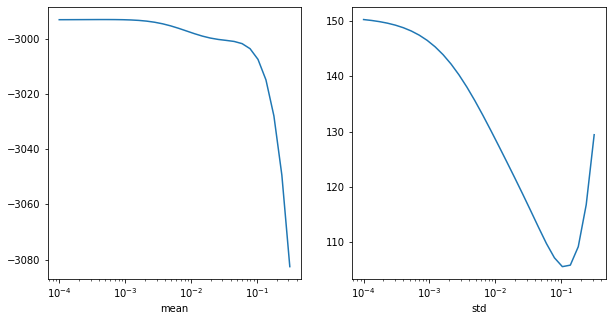

1

In [8]:
%matplotlib inline
from graph import graph
graph(ridge_reg,X,y)

In [121]:
np.set_printoptions(suppress=True)
ridge=Ridge(alpha=0.01)
ridge.fit(X,y)
ridge.coef_

array([  -7.19945679, -234.55293001,  520.58313622,  320.52335582,
       -380.60706569,  150.48375154,  -78.59123221,  130.31305868,
        592.34958662,   71.1337681 ])

## Lasso regression

In [11]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_validate
def lasso_reg(X,y,alpha=0.01):
    lasso=Lasso(alpha=alpha)
    kfold=KFold(n_splits=5,random_state=42)
    result=cross_validate(lasso,X,y,cv=kfold,scoring=['neg_mean_squared_error'])    
    return result['test_neg_mean_squared_error'].mean(), result['test_neg_mean_squared_error'].std()

lasso_reg(X,y)

(-2999.669711702646, 130.22893082063337)

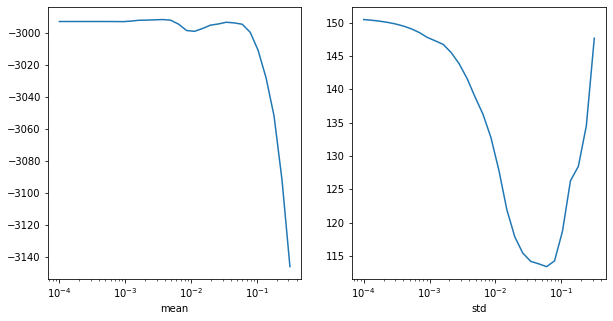

1

In [12]:
from graph import graph
graph(lasso_reg,X,y)

In [83]:
lasso=Lasso(alpha=0.555)
lasso.fit(X_transformed,y)
lasso.coef_

array([-272.12521143,  444.68379716,  168.39174684,   24.12235552,
        -10.23760272,   -2.9186432 ,   -4.67421249,  127.1299292 ,
         -3.48174292,    5.87425143,    3.6995145 ])